In [3]:
#printing ranges (NumPy)

import numpy as np
import pandas as pd
import datetime

In [4]:
filename = "transaction-data-adhoc-analysis.json"

df = pd.read_json(filename)

print(df)

                                                 address   birthdate  \
0                              USNS Wagner\nFPO AE 00917  1926/03/11   
1                             USCGC Benson\nFPO AP 48794  2016/07/08   
2                             USCGC Benson\nFPO AP 48794  2016/07/08   
3                             USCGC Benson\nFPO AP 48794  2016/07/08   
4               33911 Hansen Loaf\nWest Sandra, ND 54188  1949/09/27   
...                                                  ...         ...   
83031      96081 Harrison Brooks\nJenniferbury, MA 02124  2019/10/26   
83032  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
83033  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
83034  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
83035                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   

                            mail               name sex       username  \
0         watsonbrenda@gmail.com  Jennifer Campbell   F  vero

In [5]:
df.drop(labels=["address","birthdate","mail","name", "sex", "username"], axis=1)

,transaction_items,transaction_value,transaction_date
0,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...
83031,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [6]:
#New DataFrame
new_df= df[["transaction_items","transaction_date","transaction_value"]].copy()
new_df
new_df["Tentative_Date"] = pd.to_datetime(df['transaction_date'])
new_df["Final_Date"]=new_df["Tentative_Date"].dt.to_period('M')
items = new_df["transaction_items"].str.split(';', expand=True)
new_df["First Item"]= items[0]
new_df["Second Item"]= items[1]
new_df["Third Item"]= items[2]
new_df.head()

,transaction_items,transaction_date,transaction_value,Tentative_Date,Final_Date,First Item,Second Item,Third Item
0,"Exotic Extras,Beef Chicharon,(x4)",2022/01/12,5196,2022-01-12,2022-01,"Exotic Extras,Beef Chicharon,(x4)",None,None
1,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",2022/01/12,12056,2022-01-12,2022-01,"Exotic Extras,Beef Chicharon,(x3)","HealthyKid 3+,Nutrional Milk,(x4)","Candy City,Orange Beans,(x1)"
2,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",2022/01/08,5500,2022-01-08,2022-01,"HealthyKid 3+,Gummy Vitamins,(x3)","HealthyKid 3+,Yummy Vegetables,(x2)",None
3,"HealthyKid 3+,Yummy Vegetables,(x1)",2022/01/10,500,2022-01-10,2022-01,"HealthyKid 3+,Yummy Vegetables,(x1)",None,None
4,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2022/01/24,2697,2022-01-24,2022-01,"Candy City,Orange Beans,(x3)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Gummy Vitamins,(x1)"


In [7]:
new_df["month"]=pd.DatetimeIndex(new_df["transaction_date"]).month
new_df

,transaction_items,transaction_date,transaction_value,Tentative_Date,Final_Date,First Item,Second Item,Third Item,month
0,"Exotic Extras,Beef Chicharon,(x4)",2022/01/12,5196,2022-01-12,2022-01,"Exotic Extras,Beef Chicharon,(x4)",None,None,1
1,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",2022/01/12,12056,2022-01-12,2022-01,"Exotic Extras,Beef Chicharon,(x3)","HealthyKid 3+,Nutrional Milk,(x4)","Candy City,Orange Beans,(x1)",1
2,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",2022/01/08,5500,2022-01-08,2022-01,"HealthyKid 3+,Gummy Vitamins,(x3)","HealthyKid 3+,Yummy Vegetables,(x2)",None,1
3,"HealthyKid 3+,Yummy Vegetables,(x1)",2022/01/10,500,2022-01-10,2022-01,"HealthyKid 3+,Yummy Vegetables,(x1)",None,None,1
4,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2022/01/24,2697,2022-01-24,2022-01,"Candy City,Orange Beans,(x3)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Gummy Vitamins,(x1)",1
...,...,...,...,...,...,...,...,...,...
83031,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",2022/06/05,3588,2022-06-05,2022-06,"Exotic Extras,Kimchi and Seaweed,(x2)","HealthyKid 3+,Nutrional Milk,(x1)",None,6
83032,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2022/06/12,2095,2022-06-12,2022-06,"HealthyKid 3+,Yummy Vegetables,(x1)","Exotic Extras,Kimchi and Seaweed,(x1)","Candy City,Orange Beans,(x4)",6
83033,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",2022/06/15,3396,2022-06-15,2022-06,"Candy City,Orange Beans,(x4)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Yummy Vegetables,(x4)",6
83034,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",2022/06/09,4280,2022-06-09,2022-06,"HealthyKid 3+,Nutrional Milk,(x2)","Candy City,Gummy Worms,(x2)",None,6


In [8]:
new_df.drop(labels=["transaction_items","transaction_date","Tentative_Date","Final_Date"],axis=1)

,transaction_value,First Item,Second Item,Third Item,month
0,5196,"Exotic Extras,Beef Chicharon,(x4)",None,None,1
1,12056,"Exotic Extras,Beef Chicharon,(x3)","HealthyKid 3+,Nutrional Milk,(x4)","Candy City,Orange Beans,(x1)",1
2,5500,"HealthyKid 3+,Gummy Vitamins,(x3)","HealthyKid 3+,Yummy Vegetables,(x2)",None,1
3,500,"HealthyKid 3+,Yummy Vegetables,(x1)",None,None,1
4,2697,"Candy City,Orange Beans,(x3)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Gummy Vitamins,(x1)",1
...,...,...,...,...,...
83031,3588,"Exotic Extras,Kimchi and Seaweed,(x2)","HealthyKid 3+,Nutrional Milk,(x1)",None,6
83032,2095,"HealthyKid 3+,Yummy Vegetables,(x1)","Exotic Extras,Kimchi and Seaweed,(x1)","Candy City,Orange Beans,(x4)",6
83033,3396,"Candy City,Orange Beans,(x4)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Yummy Vegetables,(x4)",6
83034,4280,"HealthyKid 3+,Nutrional Milk,(x2)","Candy City,Gummy Worms,(x2)",None,6


In [9]:
#Make it so that the values under each column only has one comma and change it to a |

def value(x):
    if x==None:
        return ("None, 0")
    else:
        items=x.split(",")
        items_final=items[0]+" | "+items[1]+","+items[2]
        return items_final

In [10]:
new_df["Final_First_Item"]=new_df["First Item"].apply(value)
new_df["Final_Second_Item"]=new_df["Second Item"].apply(value)
new_df["Final_Third_Item"]=new_df["Third Item"].apply(value)
new_df.drop(labels=["transaction_items","transaction_date","Tentative_Date","Final_Date"],axis=1)

,transaction_value,First Item,Second Item,Third Item,month,Final_First_Item,Final_Second_Item,Final_Third_Item
0,5196,"Exotic Extras,Beef Chicharon,(x4)",None,None,1,"Exotic Extras | Beef Chicharon,(x4)","None, 0","None, 0"
1,12056,"Exotic Extras,Beef Chicharon,(x3)","HealthyKid 3+,Nutrional Milk,(x4)","Candy City,Orange Beans,(x1)",1,"Exotic Extras | Beef Chicharon,(x3)","HealthyKid 3+ | Nutrional Milk,(x4)","Candy City | Orange Beans,(x1)"
2,5500,"HealthyKid 3+,Gummy Vitamins,(x3)","HealthyKid 3+,Yummy Vegetables,(x2)",None,1,"HealthyKid 3+ | Gummy Vitamins,(x3)","HealthyKid 3+ | Yummy Vegetables,(x2)","None, 0"
3,500,"HealthyKid 3+,Yummy Vegetables,(x1)",None,None,1,"HealthyKid 3+ | Yummy Vegetables,(x1)","None, 0","None, 0"
4,2697,"Candy City,Orange Beans,(x3)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Gummy Vitamins,(x1)",1,"Candy City | Orange Beans,(x3)","Candy City | Gummy Worms,(x4)","HealthyKid 3+ | Gummy Vitamins,(x1)"
...,...,...,...,...,...,...,...,...
83031,3588,"Exotic Extras,Kimchi and Seaweed,(x2)","HealthyKid 3+,Nutrional Milk,(x1)",None,6,"Exotic Extras | Kimchi and Seaweed,(x2)","HealthyKid 3+ | Nutrional Milk,(x1)","None, 0"
83032,2095,"HealthyKid 3+,Yummy Vegetables,(x1)","Exotic Extras,Kimchi and Seaweed,(x1)","Candy City,Orange Beans,(x4)",6,"HealthyKid 3+ | Yummy Vegetables,(x1)","Exotic Extras | Kimchi and Seaweed,(x1)","Candy City | Orange Beans,(x4)"
83033,3396,"Candy City,Orange Beans,(x4)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Yummy Vegetables,(x4)",6,"Candy City | Orange Beans,(x4)","Candy City | Gummy Worms,(x4)","HealthyKid 3+ | Yummy Vegetables,(x4)"
83034,4280,"HealthyKid 3+,Nutrional Milk,(x2)","Candy City,Gummy Worms,(x2)",None,6,"HealthyKid 3+ | Nutrional Milk,(x2)","Candy City | Gummy Worms,(x2)","None, 0"


In [11]:
new_2_df= new_df[["month","Final_First_Item","Final_Second_Item","Final_Third_Item","transaction_value"]].copy()
new_2_df
new_2_df[["First Transaction","Q1"]]=new_2_df["Final_First_Item"].str.split(',',expand=True)
new_2_df[["Second Transaction","Q2"]]=new_2_df["Final_Second_Item"].str.split(',', expand=True)
new_2_df[["Third Transaction","Q3"]]=new_2_df["Final_Third_Item"].str.split(',', expand=True)
new_2_df

,month,Final_First_Item,Final_Second_Item,Final_Third_Item,transaction_value,First Transaction,Q1,Second Transaction,Q2,Third Transaction,Q3
0,1,"Exotic Extras | Beef Chicharon,(x4)","None, 0","None, 0",5196,Exotic Extras | Beef Chicharon,(x4),None,0,None,0
1,1,"Exotic Extras | Beef Chicharon,(x3)","HealthyKid 3+ | Nutrional Milk,(x4)","Candy City | Orange Beans,(x1)",12056,Exotic Extras | Beef Chicharon,(x3),HealthyKid 3+ | Nutrional Milk,(x4),Candy City | Orange Beans,(x1)
2,1,"HealthyKid 3+ | Gummy Vitamins,(x3)","HealthyKid 3+ | Yummy Vegetables,(x2)","None, 0",5500,HealthyKid 3+ | Gummy Vitamins,(x3),HealthyKid 3+ | Yummy Vegetables,(x2),None,0
3,1,"HealthyKid 3+ | Yummy Vegetables,(x1)","None, 0","None, 0",500,HealthyKid 3+ | Yummy Vegetables,(x1),None,0,None,0
4,1,"Candy City | Orange Beans,(x3)","Candy City | Gummy Worms,(x4)","HealthyKid 3+ | Gummy Vitamins,(x1)",2697,Candy City | Orange Beans,(x3),Candy City | Gummy Worms,(x4),HealthyKid 3+ | Gummy Vitamins,(x1)
...,...,...,...,...,...,...,...,...,...,...,...
83031,6,"Exotic Extras | Kimchi and Seaweed,(x2)","HealthyKid 3+ | Nutrional Milk,(x1)","None, 0",3588,Exotic Extras | Kimchi and Seaweed,(x2),HealthyKid 3+ | Nutrional Milk,(x1),None,0
83032,6,"HealthyKid 3+ | Yummy Vegetables,(x1)","Exotic Extras | Kimchi and Seaweed,(x1)","Candy City | Orange Beans,(x4)",2095,HealthyKid 3+ | Yummy Vegetables,(x1),Exotic Extras | Kimchi and Seaweed,(x1),Candy City | Orange Beans,(x4)
83033,6,"Candy City | Orange Beans,(x4)","Candy City | Gummy Worms,(x4)","HealthyKid 3+ | Yummy Vegetables,(x4)",3396,Candy City | Orange Beans,(x4),Candy City | Gummy Worms,(x4),HealthyKid 3+ | Yummy Vegetables,(x4)
83034,6,"HealthyKid 3+ | Nutrional Milk,(x2)","Candy City | Gummy Worms,(x2)","None, 0",4280,HealthyKid 3+ | Nutrional Milk,(x2),Candy City | Gummy Worms,(x2),None,0


In [12]:
new_2_df= new_df[["month","Final_First_Item","Final_Second_Item","Final_Third_Item","transaction_value"]].copy()
new_2_df
new_2_df[["First Transaction","Q1"]]=new_2_df["Final_First_Item"].str.split(',',expand=True)
new_2_df[["Second Transaction","Q2"]]=new_2_df["Final_Second_Item"].str.split(',', expand=True)
new_2_df[["Third Transaction","Q3"]]=new_2_df["Final_Third_Item"].str.split(',', expand=True)
new_2_df.drop(labels=["Final_First_Item","Final_Second_Item","Final_Third_Item"],axis=1)

,month,transaction_value,First Transaction,Q1,Second Transaction,Q2,Third Transaction,Q3
0,1,5196,Exotic Extras | Beef Chicharon,(x4),None,0,None,0
1,1,12056,Exotic Extras | Beef Chicharon,(x3),HealthyKid 3+ | Nutrional Milk,(x4),Candy City | Orange Beans,(x1)
2,1,5500,HealthyKid 3+ | Gummy Vitamins,(x3),HealthyKid 3+ | Yummy Vegetables,(x2),None,0
3,1,500,HealthyKid 3+ | Yummy Vegetables,(x1),None,0,None,0
4,1,2697,Candy City | Orange Beans,(x3),Candy City | Gummy Worms,(x4),HealthyKid 3+ | Gummy Vitamins,(x1)
...,...,...,...,...,...,...,...,...
83031,6,3588,Exotic Extras | Kimchi and Seaweed,(x2),HealthyKid 3+ | Nutrional Milk,(x1),None,0
83032,6,2095,HealthyKid 3+ | Yummy Vegetables,(x1),Exotic Extras | Kimchi and Seaweed,(x1),Candy City | Orange Beans,(x4)
83033,6,3396,Candy City | Orange Beans,(x4),Candy City | Gummy Worms,(x4),HealthyKid 3+ | Yummy Vegetables,(x4)
83034,6,4280,HealthyKid 3+ | Nutrional Milk,(x2),Candy City | Gummy Worms,(x2),None,0


In [13]:
new_2_df["Q1"].unique()
new_2_df["Q2"].unique()
new_2_df["Q3"].unique()
new_3_df=new_2_df.drop(labels=["Final_First_Item","Final_Second_Item","Final_Third_Item"],axis=1).copy()
new_3_df

,month,transaction_value,First Transaction,Q1,Second Transaction,Q2,Third Transaction,Q3
0,1,5196,Exotic Extras | Beef Chicharon,(x4),None,0,None,0
1,1,12056,Exotic Extras | Beef Chicharon,(x3),HealthyKid 3+ | Nutrional Milk,(x4),Candy City | Orange Beans,(x1)
2,1,5500,HealthyKid 3+ | Gummy Vitamins,(x3),HealthyKid 3+ | Yummy Vegetables,(x2),None,0
3,1,500,HealthyKid 3+ | Yummy Vegetables,(x1),None,0,None,0
4,1,2697,Candy City | Orange Beans,(x3),Candy City | Gummy Worms,(x4),HealthyKid 3+ | Gummy Vitamins,(x1)
...,...,...,...,...,...,...,...,...
83031,6,3588,Exotic Extras | Kimchi and Seaweed,(x2),HealthyKid 3+ | Nutrional Milk,(x1),None,0
83032,6,2095,HealthyKid 3+ | Yummy Vegetables,(x1),Exotic Extras | Kimchi and Seaweed,(x1),Candy City | Orange Beans,(x4)
83033,6,3396,Candy City | Orange Beans,(x4),Candy City | Gummy Worms,(x4),HealthyKid 3+ | Yummy Vegetables,(x4)
83034,6,4280,HealthyKid 3+ | Nutrional Milk,(x2),Candy City | Gummy Worms,(x2),None,0


In [14]:
#Change string to integer Step 1

def change(y):
    if y=="0":
        return str("0")
    else: 
        y1=y.replace("(","")
        y2=y1.replace(")","")
        y3=y2.replace("x","")
    return y3

In [15]:
new_3_df["Q1"]=new_3_df["Q1"].apply(change)
new_3_df["Q2"]=new_3_df["Q2"].apply(change)
new_3_df["Q3"]=new_3_df["Q3"].apply(change)
new_3_df

,month,transaction_value,First Transaction,Q1,Second Transaction,Q2,Third Transaction,Q3
0,1,5196,Exotic Extras | Beef Chicharon,4,None,0,None,0
1,1,12056,Exotic Extras | Beef Chicharon,3,HealthyKid 3+ | Nutrional Milk,4,Candy City | Orange Beans,1
2,1,5500,HealthyKid 3+ | Gummy Vitamins,3,HealthyKid 3+ | Yummy Vegetables,2,None,0
3,1,500,HealthyKid 3+ | Yummy Vegetables,1,None,0,None,0
4,1,2697,Candy City | Orange Beans,3,Candy City | Gummy Worms,4,HealthyKid 3+ | Gummy Vitamins,1
...,...,...,...,...,...,...,...,...
83031,6,3588,Exotic Extras | Kimchi and Seaweed,2,HealthyKid 3+ | Nutrional Milk,1,None,0
83032,6,2095,HealthyKid 3+ | Yummy Vegetables,1,Exotic Extras | Kimchi and Seaweed,1,Candy City | Orange Beans,4
83033,6,3396,Candy City | Orange Beans,4,Candy City | Gummy Worms,4,HealthyKid 3+ | Yummy Vegetables,4
83034,6,4280,HealthyKid 3+ | Nutrional Milk,2,Candy City | Gummy Worms,2,None,0


In [16]:
#Change string to integer Step 2
def change2 (z):
    integer=int(z)
    return integer

In [17]:
new_3_df["Q1"]=new_3_df["Q1"].apply(change2)
new_3_df["Q2"]=new_3_df["Q2"].apply(change2)
new_3_df["Q3"]=new_3_df["Q3"].apply(change2)
new_3_df

,month,transaction_value,First Transaction,Q1,Second Transaction,Q2,Third Transaction,Q3
0,1,5196,Exotic Extras | Beef Chicharon,4,None,0,None,0
1,1,12056,Exotic Extras | Beef Chicharon,3,HealthyKid 3+ | Nutrional Milk,4,Candy City | Orange Beans,1
2,1,5500,HealthyKid 3+ | Gummy Vitamins,3,HealthyKid 3+ | Yummy Vegetables,2,None,0
3,1,500,HealthyKid 3+ | Yummy Vegetables,1,None,0,None,0
4,1,2697,Candy City | Orange Beans,3,Candy City | Gummy Worms,4,HealthyKid 3+ | Gummy Vitamins,1
...,...,...,...,...,...,...,...,...
83031,6,3588,Exotic Extras | Kimchi and Seaweed,2,HealthyKid 3+ | Nutrional Milk,1,None,0
83032,6,2095,HealthyKid 3+ | Yummy Vegetables,1,Exotic Extras | Kimchi and Seaweed,1,Candy City | Orange Beans,4
83033,6,3396,Candy City | Orange Beans,4,Candy City | Gummy Worms,4,HealthyKid 3+ | Yummy Vegetables,4
83034,6,4280,HealthyKid 3+ | Nutrional Milk,2,Candy City | Gummy Worms,2,None,0


In [18]:
new_3_df.head(10)
new_3_df.head(7)

,month,transaction_value,First Transaction,Q1,Second Transaction,Q2,Third Transaction,Q3
0,1,5196,Exotic Extras | Beef Chicharon,4,None,0,None,0
1,1,12056,Exotic Extras | Beef Chicharon,3,HealthyKid 3+ | Nutrional Milk,4,Candy City | Orange Beans,1
2,1,5500,HealthyKid 3+ | Gummy Vitamins,3,HealthyKid 3+ | Yummy Vegetables,2,None,0
3,1,500,HealthyKid 3+ | Yummy Vegetables,1,None,0,None,0
4,1,2697,Candy City | Orange Beans,3,Candy City | Gummy Worms,4,HealthyKid 3+ | Gummy Vitamins,1
5,1,2990,HealthyKid 3+ | Nutrional Milk,1,HealthyKid 3+ | Yummy Vegetables,2,None,0
6,1,3196,Exotic Extras | Kimchi and Seaweed,4,None,0,None,0


In [19]:
#Make Arrays for Computation 
#Treat them as system of equations
#A: Beef Chicharon
#B: Nutritional Milk
#C: Orange Beans
#D: Gummy Vitamins
#E: Yummy Vegetables
#F: Gummy Worms
#G: Kimchi and Seaweed

x=np.array([[4,0,0,0,0,0,0],
            [3,4,1,0,0,0,0],
            [0,0,0,3,2,0,0],
            [0,0,0,0,1,0,0],
            [0,0,3,1,0,4,0],
            [0,1,0,0,2,0,0],
            [0,0,0,0,0,0,4]])

In [20]:
print(x)

[[4 0 0 0 0 0 0]
 [3 4 1 0 0 0 0]
 [0 0 0 3 2 0 0]
 [0 0 0 0 1 0 0]
 [0 0 3 1 0 4 0]
 [0 1 0 0 2 0 0]
 [0 0 0 0 0 0 4]]


In [21]:
y=np.array([5196,12056,5500,500,2697,2990,3196])

In [22]:
print(y)

[ 5196 12056  5500   500  2697  2990  3196]


In [23]:
z=np.linalg.solve(x,y)

In [25]:
print(z)

[1299. 1990.  199. 1500.  500.  150.  799.]


In [26]:
def multiply (a):
    if a=="Candy City | Gummy Worms":
        return int(150)
    elif a=="Candy City | Orange Beans":
        return int(199)
    
    elif a=="Exotic Extras | Beef Chicharon":
        return int(1299)
    
    elif a=="Exotic Extras | Kimchi and Seaweed":
        return int(799)
    
    elif a=="HealthyKid 3+ | Gummy Vitamins":
        return int(1500)
    
    elif a=="HealthyKid 3+ | Nutrional Milk":
        return int(1990)
    
    elif a=="HealthyKid 3+ | Yummy Vegetables":
        return int(500)
    
    else:
        return int(0)


#Make dataframe into three separate dataframes (1)
new_Final1_df = new_3_df[['month','First Transaction','Q1']].copy()
new_Final1_df["Price"]=new_Final1_df["First Transaction"].apply(multiply)
new_Final1_df["Total Price"]=new_Final1_df["Q1"]*new_Final1_df["Price"]
new_Final1_df
new_Final1A_df=new_Final1_df[['month','First Transaction','Total Price']].copy()
new_Final1A_df

,month,First Transaction,Total Price
0,1,Exotic Extras | Beef Chicharon,5196
1,1,Exotic Extras | Beef Chicharon,3897
2,1,HealthyKid 3+ | Gummy Vitamins,4500
3,1,HealthyKid 3+ | Yummy Vegetables,500
4,1,Candy City | Orange Beans,597
...,...,...,...
83031,6,Exotic Extras | Kimchi and Seaweed,1598
83032,6,HealthyKid 3+ | Yummy Vegetables,500
83033,6,Candy City | Orange Beans,796
83034,6,HealthyKid 3+ | Nutrional Milk,3980


In [27]:
#Make dataframe into three separate dataframes (2)
new_Final2_df = new_3_df[['month','Second Transaction','Q2']].copy()
new_Final2_df["Price"]=new_Final2_df["Second Transaction"].apply(multiply)
new_Final2_df["Total Price"]=new_Final2_df["Q2"]*new_Final2_df["Price"]
new_Final2_df
new_Final2A_df=new_Final2_df[['month','Second Transaction','Total Price']].copy()
new_Final2A_df

,month,Second Transaction,Total Price
0,1,None,0
1,1,HealthyKid 3+ | Nutrional Milk,7960
2,1,HealthyKid 3+ | Yummy Vegetables,1000
3,1,None,0
4,1,Candy City | Gummy Worms,600
...,...,...,...
83031,6,HealthyKid 3+ | Nutrional Milk,1990
83032,6,Exotic Extras | Kimchi and Seaweed,799
83033,6,Candy City | Gummy Worms,600
83034,6,Candy City | Gummy Worms,300


In [28]:
#Make dataframe into three separate dataframes (3)
new_Final3_df = new_3_df[['month','Third Transaction','Q3']].copy()
new_Final3_df["Price"]=new_Final3_df["Third Transaction"].apply(multiply)
new_Final3_df["Total Price"]=new_Final3_df["Q3"]*new_Final3_df["Price"]
new_Final3_df
new_Final3A_df=new_Final3_df[['month','Third Transaction','Total Price']].copy()
new_Final3A_df

,month,Third Transaction,Total Price
0,1,None,0
1,1,Candy City | Orange Beans,199
2,1,None,0
3,1,None,0
4,1,HealthyKid 3+ | Gummy Vitamins,1500
...,...,...,...
83031,6,None,0
83032,6,Candy City | Orange Beans,796
83033,6,HealthyKid 3+ | Yummy Vegetables,2000
83034,6,None,0


In [29]:
#Make Pivot Table for Each DataFrame 1
output_1 = pd.pivot_table(new_Final1A_df, index=['First Transaction'],
                        columns = 'month',
                        values='Total Price',
                        aggfunc=['sum'],
                        fill_value=None,
                        margins=False,
                        dropna=True,
                        margins_name='All',
                        observed=False,
                        sort=True)
output_1

sum                             \
month                                     1        2        3        4   
First Transaction                                                        
Candy City | Gummy Worms             726600   722700   776700   732150   
Candy City | Orange Beans            984453  1027238   951817   991418   
Exotic Extras | Beef Chicharon      6439143  6623601  6252087  6362502   
Exotic Extras | Kimchi and Seaweed  3880743  3899919  4032553  3892728   
HealthyKid 3+ | Gummy Vitamins      7279500  7617000  7630500  7288500   
HealthyKid 3+ | Nutrional Milk      9661450  9639560  9466430  9522150   
HealthyKid 3+ | Yummy Vegetables    2540000  2465000  2444000  2520500   

                                                      
month                                     5        6  
First Transaction                                     
Candy City | Gummy Worms             741900   753600  
Candy City | Orange Beans            994801   999776  
Exotic Extras | Beef Chicharon      6423555  6292356  
Exotic Extras | Kimchi and Seaweed  3882341  4032553  
HealthyKid 3+ | Gummy Vitamins      7467000  7348500  
HealthyKid 3+ | Nutrional Milk      9663440  9518170  
HealthyKid 3+ | Yummy Vegetables    2482500  2485500

In [30]:
#Make Pivot Table for Each DataFrame 2
output_2 = pd.pivot_table(new_Final2A_df, index=['Second Transaction'],
                        columns = 'month',
                        values='Total Price',
                        aggfunc=['sum'],
                        fill_value=None,
                        margins=False,
                        dropna=True,
                        margins_name='All',
                        observed=False,
                        sort=True)
output_2

sum                             \
month                                     1        2        3        4   
Second Transaction                                                       
Candy City | Gummy Worms             480150   504150   476100   499050   
Candy City | Orange Beans            665257   653715   643168   668043   
Exotic Extras | Beef Chicharon      4082757  4316577  4399713  4269813   
Exotic Extras | Kimchi and Seaweed  2554403  2670258  2631906  2753354   
HealthyKid 3+ | Gummy Vitamins      4674000  4944000  5005500  4920000   
HealthyKid 3+ | Nutrional Milk      6568990  6373970  6897340  6547100   
HealthyKid 3+ | Yummy Vegetables    1639000  1831000  1649500  1613500   
None                                      0        0        0        0   

                                                      
month                                     5        6  
Second Transaction                                    
Candy City | Gummy Worms             484200   492150  
Candy City | Orange Beans            666849   657297  
Exotic Extras | Beef Chicharon      4393218  4355547  
Exotic Extras | Kimchi and Seaweed  2574378  2715002  
HealthyKid 3+ | Gummy Vitamins      4806000  4975500  
HealthyKid 3+ | Nutrional Milk      6732170  6636650  
HealthyKid 3+ | Yummy Vegetables    1577000  1610000  
None                                      0        0

In [31]:
#Make Pivot Table for Each DataFrame 3
output_3 = pd.pivot_table(new_Final3A_df, index=['Third Transaction'],
                        columns = 'month',
                        values='Total Price',
                        aggfunc=['sum'],
                        fill_value=None,
                        margins=False,
                        dropna=True,
                        margins_name='All',
                        observed=False,
                        sort=True)
output_3

sum                             \
month                                     1        2        3        4   
Third Transaction                                                        
Candy City | Gummy Worms             227100   272550   245100   275250   
Candy City | Orange Beans            295316   316410   317604   313425   
Exotic Extras | Beef Chicharon      2032935  2051121  2099184  2214795   
Exotic Extras | Kimchi and Seaweed  1295978  1379074  1299174  1280797   
HealthyKid 3+ | Gummy Vitamins      2568000  2409000  2581500  2554500   
HealthyKid 3+ | Nutrional Milk      3126290  3271560  3289470  3404890   
HealthyKid 3+ | Yummy Vegetables     800500   832000   854500   796500   
None                                      0        0        0        0   

                                                      
month                                     5        6  
Third Transaction                                     
Candy City | Gummy Worms             244050   244350  
Candy City | Orange Beans            321186   354021  
Exotic Extras | Beef Chicharon      2209599  2214795  
Exotic Extras | Kimchi and Seaweed  1351908  1325541  
HealthyKid 3+ | Gummy Vitamins      2649000  2646000  
HealthyKid 3+ | Nutrional Milk      3267580  3281510  
HealthyKid 3+ | Yummy Vegetables     808000   765500  
None                                      0        0

In [32]:
#Make Final Pivot Table

final_pivot_table=output_1+output_2+output_3
final_pivot_table

sum                          \
month                                        1           2           3   
Candy City | Gummy Worms             1433850.0   1499400.0   1497900.0   
Candy City | Orange Beans            1945026.0   1997363.0   1912589.0   
Exotic Extras | Beef Chicharon      12554835.0  12991299.0  12750984.0   
Exotic Extras | Kimchi and Seaweed   7731124.0   7949251.0   7963633.0   
HealthyKid 3+ | Gummy Vitamins      14521500.0  14970000.0  15217500.0   
HealthyKid 3+ | Nutrional Milk      19356730.0  19285090.0  19653240.0   
HealthyKid 3+ | Yummy Vegetables     4979500.0   5128000.0   4948000.0   
None                                       NaN         NaN         NaN   

                                                                        
month                                        4           5           6  
Candy City | Gummy Worms             1506450.0   1470150.0   1490100.0  
Candy City | Orange Beans            1972886.0   1982836.0   2011094.0  
Exotic Extras | Beef Chicharon      12847110.0  13026372.0  12862698.0  
Exotic Extras | Kimchi and Seaweed   7926879.0   7808627.0   8073096.0  
HealthyKid 3+ | Gummy Vitamins      14763000.0  14922000.0  14970000.0  
HealthyKid 3+ | Nutrional Milk      19474140.0  19663190.0  19436330.0  
HealthyKid 3+ | Yummy Vegetables     4930500.0   4867500.0   4861000.0  
None                                       NaN         NaN         NaN

In [33]:
#Remove unecessary row
final_pivot_table_2= final_pivot_table.drop('None', axis = 0)
final_pivot_table_2

sum                          \
month                                        1           2           3   
Candy City | Gummy Worms             1433850.0   1499400.0   1497900.0   
Candy City | Orange Beans            1945026.0   1997363.0   1912589.0   
Exotic Extras | Beef Chicharon      12554835.0  12991299.0  12750984.0   
Exotic Extras | Kimchi and Seaweed   7731124.0   7949251.0   7963633.0   
HealthyKid 3+ | Gummy Vitamins      14521500.0  14970000.0  15217500.0   
HealthyKid 3+ | Nutrional Milk      19356730.0  19285090.0  19653240.0   
HealthyKid 3+ | Yummy Vegetables     4979500.0   5128000.0   4948000.0   

                                                                        
month                                        4           5           6  
Candy City | Gummy Worms             1506450.0   1470150.0   1490100.0  
Candy City | Orange Beans            1972886.0   1982836.0   2011094.0  
Exotic Extras | Beef Chicharon      12847110.0  13026372.0  12862698.0  
Exotic Extras | Kimchi and Seaweed   7926879.0   7808627.0   8073096.0  
HealthyKid 3+ | Gummy Vitamins      14763000.0  14922000.0  14970000.0  
HealthyKid 3+ | Nutrional Milk      19474140.0  19663190.0  19436330.0  
HealthyKid 3+ | Yummy Vegetables     4930500.0   4867500.0   4861000.0

In [43]:
#Make pivot table into dataframe to make graphs

Graph_df={'Months': ['1', '2', '3','4','5','6'],'Exotic Extras,Beef Chicharon': [final_pivot_table_2.iloc[2,0], final_pivot_table_2.iloc[2,1],final_pivot_table_2.iloc[2,2],final_pivot_table_2.iloc[2,3],final_pivot_table_2.iloc[2,4],final_pivot_table_2.iloc[2,5]],"Candy City,Gummy Worms":[final_pivot_table_2.iloc[0,0], final_pivot_table_2.iloc[0,1], final_pivot_table_2.iloc[0,2], final_pivot_table_2.iloc[0,3], final_pivot_table_2.iloc[0,4], final_pivot_table_2.iloc[0,5]],"HealthyKid 3+,Gummy Vitamins":[final_pivot_table_2.iloc[4,0], final_pivot_table_2.iloc[4,1], final_pivot_table_2.iloc[4,2], final_pivot_table_2.iloc[4,3], final_pivot_table_2.iloc[4,4], final_pivot_table_2.iloc[4,5]],"Exotic Extras,Kimchi and Seaweed":[final_pivot_table_2.iloc[3,0], final_pivot_table_2.iloc[3,1],final_pivot_table_2.iloc[3,2], final_pivot_table_2.iloc[3,3], final_pivot_table_2.iloc[3,4], final_pivot_table_2.iloc[3,5]],"HealthyKid 3+,Nutrional Milk":[final_pivot_table_2.iloc[5,0], final_pivot_table_2.iloc[5,1], final_pivot_table_2.iloc[5,2], final_pivot_table_2.iloc[5,3], final_pivot_table_2.iloc[5,4], final_pivot_table_2.iloc[5,5]],"Candy City,Orange Beans":[final_pivot_table_2.iloc[1,0], final_pivot_table_2.iloc[1,1], final_pivot_table_2.iloc[1,2], final_pivot_table_2.iloc[1,3], final_pivot_table_2.iloc[1,4], final_pivot_table_2.iloc[1,5]],"HealthyKid 3+,Yummy Vegetables":[final_pivot_table_2.iloc[6,0],final_pivot_table_2.iloc[6,1],final_pivot_table_2.iloc[6,2],final_pivot_table_2.iloc[6,3],final_pivot_table_2.iloc[6,4],final_pivot_table_2.iloc[6,5]]}
Final_Graph_df = pd.DataFrame(Graph_df).set_index('Months')
Final_Graph_df

,"Exotic Extras,Beef Chicharon","Candy City,Gummy Worms","HealthyKid 3+,Gummy Vitamins","Exotic Extras,Kimchi and Seaweed","HealthyKid 3+,Nutrional Milk","Candy City,Orange Beans","HealthyKid 3+,Yummy Vegetables"
Months,,,,,,,
1,12554835.0,1433850.0,14521500.0,7731124.0,19356730.0,1945026.0,4979500.0
2,12991299.0,1499400.0,14970000.0,7949251.0,19285090.0,1997363.0,5128000.0
3,12750984.0,1497900.0,15217500.0,7963633.0,19653240.0,1912589.0,4948000.0
4,12847110.0,1506450.0,14763000.0,7926879.0,19474140.0,1972886.0,4930500.0
5,13026372.0,1470150.0,14922000.0,7808627.0,19663190.0,1982836.0,4867500.0
6,12862698.0,1490100.0,14970000.0,8073096.0,19436330.0,2011094.0,4861000.0


<AxesSubplot:xlabel='Months'>

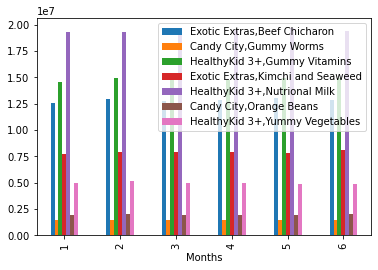

In [58]:
import matplotlib.pyplot as plt
Final_Graph_df.iloc[:,:].plot(kind='bar')

<AxesSubplot:xlabel='Months'>

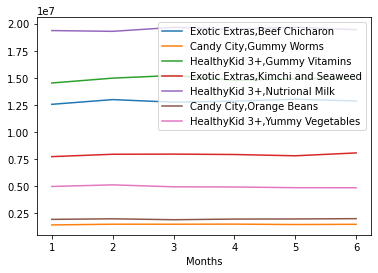

In [59]:
Final_Graph_df.iloc[:,:].plot(kind='line')

<AxesSubplot:ylabel='1'>

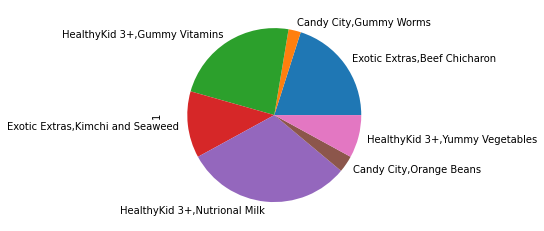

In [60]:
#Month 1
Final_Graph_df.iloc[0,:].plot(kind='pie')

<AxesSubplot:ylabel='2'>

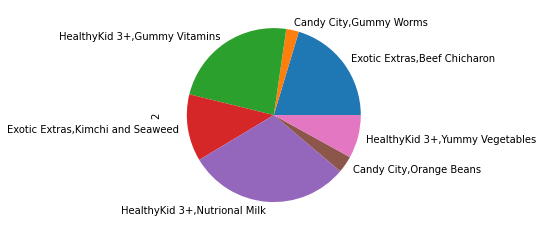

In [61]:
#Month 2
Final_Graph_df.iloc[1,:].plot(kind='pie')

<AxesSubplot:ylabel='3'>

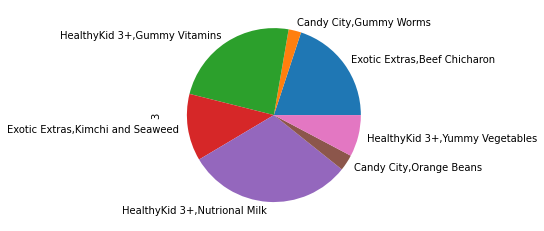

In [62]:
#Month 3
Final_Graph_df.iloc[2,:].plot(kind='pie')

<AxesSubplot:ylabel='4'>

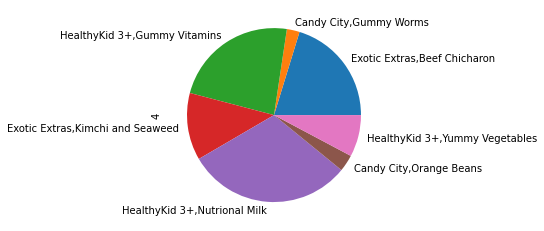

In [63]:
#Month 4
Final_Graph_df.iloc[3,:].plot(kind='pie')

<AxesSubplot:ylabel='5'>

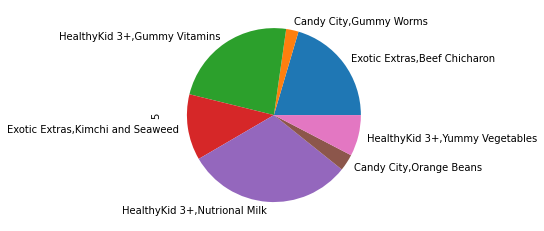

In [64]:
#Month 5
Final_Graph_df.iloc[4,:].plot(kind='pie')

<AxesSubplot:ylabel='6'>

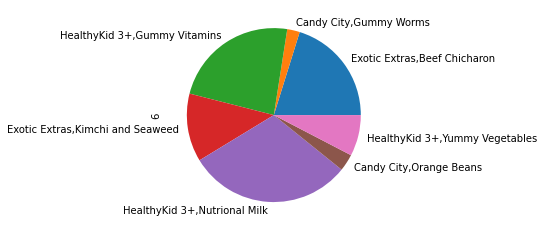

In [65]:
#Month 6
Final_Graph_df.iloc[5,:].plot(kind='pie')